# CMSE 202 Group Project
## Correlation between Stocks in the S&P500 index

### Team name: The Greener Side
Team members:
Ayaan, Zhou, Akhila, Joanna

### Research Question: To what extent do the S&P 500 stocks such as Google, Apple, Tesla etc. correlate with each other and with the S&P500? 

Required imports

In [1]:
import numpy as np
import pandas as pd

import yfinance as yf
from yahoofinancials import YahooFinancials

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

Loading the past 2 year SPY stock data using yfinance

In [55]:
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

spy_df = yf.download('SPY', start, end)
spy_df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-11-30  362.829987  363.119995  359.170013  362.059998  351.708588   
2020-12-01  365.570007  367.679993  364.929993  366.019989  355.555389   
2020-12-02  364.820007  366.959991  364.200012  366.790009  356.303375   
2020-12-03  366.679993  368.190002  365.500000  366.690002  356.206238   
2020-12-04  367.320007  369.850006  367.220001  369.850006  359.275909   
...                ...         ...         ...         ...         ...   
2022-11-21  394.640015  395.820007  392.660004  394.589996  394.589996   
2022-11-22  396.630005  400.070007  395.149994  399.899994  399.899994   
2022-11-23  399.549988  402.929993  399.309998  402.420013  402.420013   
2022-11-25  401.829987  402.910004  401.540009  402.329987  402.329987   
2022-11-28  399.089996  400.809998  397.581299  398.445007  398.445007   

              Volume  
Date                  
2020-11-30  83872700  
2020-12-01  74231400  
2020-12-02  45927000  
2020-12-03  62882000  
2020-12-04  50749900  
...              ...  
2022-11-21  51243200  
2022-11-22  60429000  
2022-11-23  68261600  
2022-11-25  30545400  
2022-11-28  25456853  

[503 rows x 6 columns]

## Analysis

In [56]:
spy_df.describe()

Open        High         Low       Close   Adj Close  \
count  503.000000  503.000000  503.000000  503.000000  503.000000   
mean   416.536004  419.238886  413.579466  416.588460  410.934146   
std     31.395116   31.070860   31.554138   31.338187   30.925004   
min    349.209991  359.820007  348.109985  356.559998  351.708588   
25%    389.755005  391.785004  386.849991  389.665009  383.731400   
50%    417.339996  419.559998  415.010010  417.269989  411.008911   
75%    442.709991  444.794998  439.654999  442.494995  435.836304   
max    479.220001  479.980011  476.059998  477.709991  472.242310   

             Volume  
count  5.030000e+02  
mean   8.316883e+07  
std    3.227900e+07  
min    2.545685e+07  
25%    5.839370e+07  
50%    7.663740e+07  
75%    1.019252e+08  
max    2.517839e+08

In [57]:
spy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2020-11-30 to 2022-11-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       503 non-null    float64
 1   High       503 non-null    float64
 2   Low        503 non-null    float64
 3   Close      503 non-null    float64
 4   Adj Close  503 non-null    float64
 5   Volume     503 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


### Plotting the stock prices

In [58]:
spy_df.reset_index(inplace=True)

<AxesSubplot: title={'center': "SPY's stock price"}, xlabel='Date'>

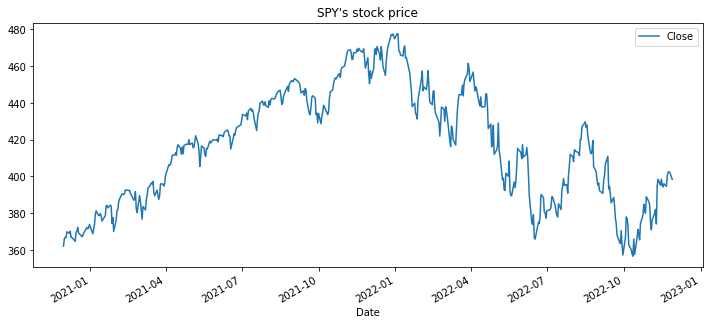

In [59]:
spy_df.plot(x='Date', y='Close', title="SPY's stock price", figsize=(12, 5))

Candlestick graph with interactive slider and hover

In [60]:
fig = go.Figure(data=[go.Candlestick(x=spy_df['Date'],
                open=spy_df['Open'],
                high=spy_df['High'],
                low=spy_df['Low'],
                close=spy_df['Close'])])

fig.show()

### Looking at the Moving Averages

In [61]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA{}".format(ma)
    spy_df[column_name] = spy_df['Adj Close'].rolling(ma).mean()
spy_df

Date        Open        High         Low       Close   Adj Close  \
0   2020-11-30  362.829987  363.119995  359.170013  362.059998  351.708588   
1   2020-12-01  365.570007  367.679993  364.929993  366.019989  355.555389   
2   2020-12-02  364.820007  366.959991  364.200012  366.790009  356.303375   
3   2020-12-03  366.679993  368.190002  365.500000  366.690002  356.206238   
4   2020-12-04  367.320007  369.850006  367.220001  369.850006  359.275909   
..         ...         ...         ...         ...         ...         ...   
498 2022-11-21  394.640015  395.820007  392.660004  394.589996  394.589996   
499 2022-11-22  396.630005  400.070007  395.149994  399.899994  399.899994   
500 2022-11-23  399.549988  402.929993  399.309998  402.420013  402.420013   
501 2022-11-25  401.829987  402.910004  401.540009  402.329987  402.329987   
502 2022-11-28  399.089996  400.809998  397.581299  398.445007  398.445007   

       Volume        MA10        MA20        MA50  
0    83872700         NaN         NaN         NaN  
1    74231400         NaN         NaN         NaN  
2    45927000         NaN         NaN         NaN  
3    62882000         NaN         NaN         NaN  
4    50749900         NaN         NaN         NaN  
..        ...         ...         ...         ...  
498  51243200  392.325000  386.605000  377.633031  
499  60429000  394.114999  387.353999  377.801194  
500  68261600  396.944000  388.374001  377.989881  
501  30545400  397.707999  389.491499  378.266000  
502  25456853  397.701498  389.962750  378.523701  

[503 rows x 10 columns]

Plot for the moving averages

<AxesSubplot: >

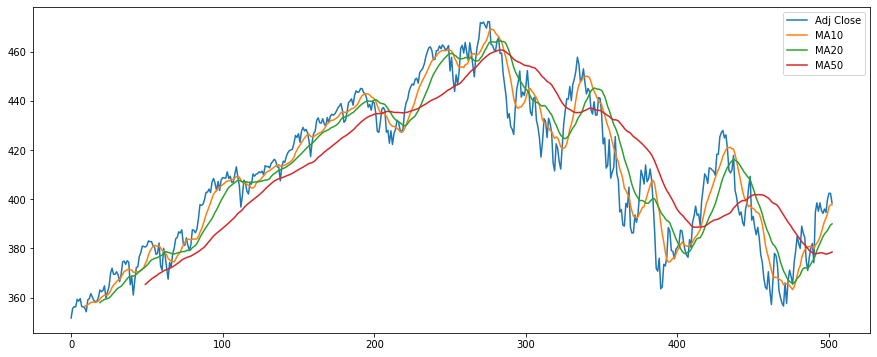

In [62]:
spy_df[['Adj Close', 'MA10', 'MA20', 'MA50']].plot(figsize=(15, 6))


### Checking for correlation
Checking with GOOGL stock

In [63]:
goo_df = yf.download('GOOGL', start, end)
goo_df.reset_index(inplace=True)
goo_df

[*********************100%***********************]  1 of 1 completed


Date       Open       High        Low      Close  Adj Close  \
0   2020-11-30  88.782501  89.016998  87.391998  87.720001  87.720001   
1   2020-12-01  88.333000  91.085999  88.151497  89.767998  89.767998   
2   2020-12-02  89.767998  91.637001  89.258499  91.248497  91.248497   
3   2020-12-03  91.027000  92.191498  90.849998  91.092003  91.092003   
4   2020-12-04  91.011002  91.474998  90.679497  91.188004  91.188004   
..         ...        ...        ...        ...        ...        ...   
498 2022-11-21  97.290001  98.400002  95.360001  95.599998  95.599998   
499 2022-11-22  95.949997  97.220001  94.050003  97.050003  97.050003   
500 2022-11-23  97.089996  98.760002  97.089996  98.459999  98.459999   
501 2022-11-25  98.239998  98.639999  97.400002  97.459999  97.459999   
502 2022-11-28  97.036301  97.580002  95.849998  96.489998  96.489998   

       Volume  
0    32418000  
1    37350000  
2    29424000  
3    24728000  
4    20544000  
..        ...  
498  21647400  
499  23438500  
500  18868100  
501   9701400  
502  11825790  

[503 rows x 7 columns]

In [76]:
msf_df = yf.download('MSFT', start, end)
msf_df.reset_index(inplace=True)
msf_df

[*********************100%***********************]  1 of 1 completed


Date        Open        High         Low       Close   Adj Close  \
0   2020-11-30  214.100006  214.759995  210.839996  214.070007  210.319778   
1   2020-12-01  214.509995  217.320007  213.350006  216.210007  212.422302   
2   2020-12-02  214.880005  215.470001  212.800003  215.369995  211.597015   
3   2020-12-03  214.610001  216.380005  213.649994  214.240005  210.486786   
4   2020-12-04  214.220001  215.380005  213.179993  214.360001  210.604675   
..         ...         ...         ...         ...         ...         ...   
497 2022-11-18  243.509995  243.740005  239.029999  241.220001  241.220001   
498 2022-11-21  241.429993  244.669998  241.190002  242.050003  242.050003   
499 2022-11-22  243.589996  245.309998  240.710007  245.029999  245.029999   
500 2022-11-23  245.110001  248.279999  244.270004  247.580002  247.580002   
501 2022-11-25  247.309998  248.699997  246.729996  247.490005  247.490005   

       Volume  
0    33064800  
1    30904500  
2    23724500  
3    25120900  
4    24666000  
..        ...  
497  27591800  
498  26394700  
499  19665700  
500  19508500  
501   9200800  

[502 rows x 7 columns]

In [77]:
stocks = pd.DataFrame()
stocks['SPY'] = spy_df['Adj Close']
stocks['GOOGL'] = goo_df['Adj Close']
stocks['MSFT'] = msf_df['Adj Close']
stocks

SPY      GOOGL        MSFT
0    351.708588  87.720001  210.319778
1    355.555389  89.767998  212.422302
2    356.303375  91.248497  211.597015
3    356.206238  91.092003  210.486786
4    359.275909  91.188004  210.604675
..          ...        ...         ...
498  394.589996  95.599998  242.050003
499  399.899994  97.050003  245.029999
500  402.420013  98.459999  247.580002
501  402.329987  97.459999  247.490005
502  398.445007  96.489998         NaN

[503 rows x 3 columns]

Calculating Percentage Change

In [78]:
stocks_pct = stocks.pct_change()
stocks_pct

SPY     GOOGL      MSFT
0         NaN       NaN       NaN
1    0.010937  0.023347  0.009997
2    0.002104  0.016493 -0.003885
3   -0.000273 -0.001715 -0.005247
4    0.008618  0.001054  0.000560
..        ...       ...       ...
498 -0.003636 -0.018783  0.003441
499  0.013457  0.015167  0.012311
500  0.006302  0.014529  0.010407
501 -0.000224 -0.010156 -0.000364
502 -0.009656 -0.009953  0.000000

[503 rows x 3 columns]

Plotting the percentage change of two stocks against each other to visualize correlation.

In [79]:
sns.jointplot(x='SPY', y='GOOGL', data=stocks_pct)

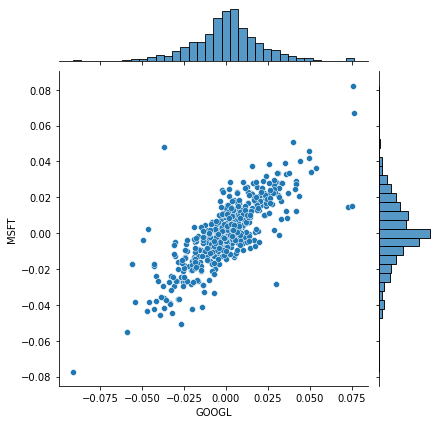

In [82]:
sns.jointplot(x='GOOGL', y='MSFT', data=stocks_pct)

Correlation heatmap

In [80]:
sns.heatmap(stocks_pct.corr(), annot=True)

<AxesSubplot: >

In [84]:
sns.pairplot(stocks_pct)

## SPY stock price prediction

In [4]:
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

data = yf.download('GOOGL', start, end)
data.reset_index(inplace=True)
data

[*********************100%***********************]  1 of 1 completed


Date       Open        High        Low       Close   Adj Close  \
0    2012-11-30  17.300051   17.497997  17.159409   17.476727   17.476727   
1    2012-12-03  17.573574   17.664915  17.370119   17.398649   17.398649   
2    2012-12-04  17.392391   17.405155  17.159660   17.293043   17.293043   
3    2012-12-05  17.321072   17.379881  17.075325   17.212713   17.212713   
4    2012-12-06  17.206957   17.407658  17.129881   17.295546   17.295546   
...         ...        ...         ...        ...         ...         ...   
2513 2022-11-23  97.089996   98.760002  97.089996   98.459999   98.459999   
2514 2022-11-25  98.239998   98.639999  97.400002   97.459999   97.459999   
2515 2022-11-28  97.040001   97.580002  95.610001   96.050003   96.050003   
2516 2022-11-29  95.730003   96.120003  94.110001   95.190002   95.190002   
2517 2022-11-30  94.820000  100.184998  94.419998  100.120003  100.120003   

         Volume  
0     126417456  
1      87612300  
2      79588332  
3      74421504  
4      58433508  
...         ...  
2513   18868100  
2514    9701400  
2515   26237500  
2516   20061700  
2517   21779418  

[2518 rows x 7 columns]

<AxesSubplot: xlabel='Date'>

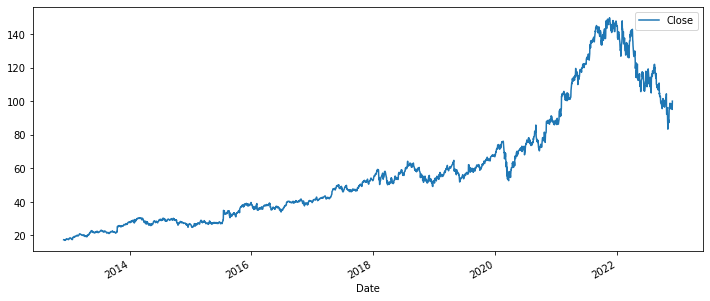

In [5]:
data.plot(x='Date', y='Close', figsize=(12, 5))

In [6]:
data = data.filter(['Close', 'Date'])
N = len(data)
train_size = 0.95

train = data.iloc[:int(N*(train_size))]
test = data.iloc[int(N*(train_size)):]

In [7]:
plt.plot(train['Close'])
plt.plot(test['Close'])

Min Max scaling the data

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
scaled_data

array([[0.00267002],
       [0.00208172],
       [0.00128599],
       ...,
       [0.59471017],
       [0.58823017],
       [0.62537712]])

Label is the closing prices and the features are the past prices for that stock. The number of days to be considered can be changed.

In [9]:
prediction_days = 60

x_train = []
y_train = []

for i in range(prediction_days, len(train)):
    x_train.append(scaled_data[i - prediction_days: i, 0])
    y_train.append(scaled_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Building LSTM

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
2332/2332 [==============================] - 39s 17ms/step - loss: 6.0112e-04
Epoch 2/3
2332/2332 [==============================] - 39s 17ms/step - loss: 3.5358e-04
Epoch 3/3
2332/2332 [==============================] - 39s 17ms/step - loss: 3.5851e-04


In [14]:
test_data = scaled_data[len(train) - 60: , :]

x_test = []
y_test = scaled_data[len(train):, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)

# getting actual price from scaler
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

107.47875802518925

In [15]:
pred = test.copy()
pred['Close'] = predictions

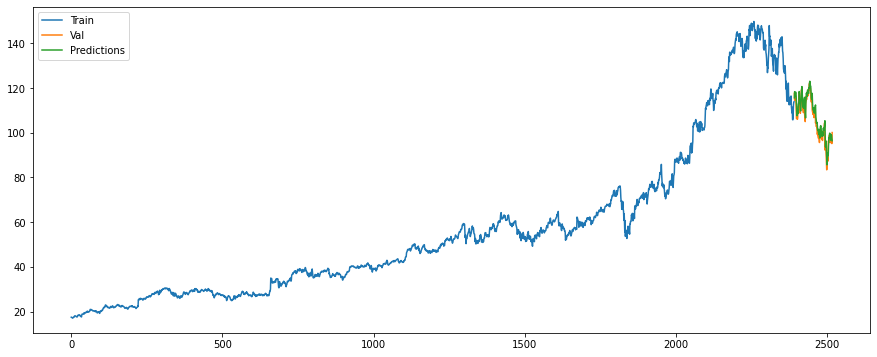

In [16]:
plt.figure(figsize=(15, 6))
plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(pred['Close'])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(train['Date'][2200:], train['Close'][2200:])
plt.plot(test['Date'], test['Close'])
plt.plot(pred['Date'], pred['Close'])
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()

In [18]:
pred

Close       Date
2392  115.649109 2022-06-02
2393  118.432762 2022-06-03
2394  116.325790 2022-06-06
2395  117.437218 2022-06-07
2396  118.012451 2022-06-08
...          ...        ...
2513   97.557388 2022-11-23
2514   99.157974 2022-11-25
2515   98.807930 2022-11-28
2516   97.484337 2022-11-29
2517   96.459084 2022-11-30

[126 rows x 2 columns]

In [19]:
real_data = [scaled_data[N - prediction_days:N,0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [20]:
real_data.shape

(1, 60, 1)

In [21]:
scaled_data[-60:]

array([[0.6956775 ],
       [0.68761518],
       [0.70471939],
       [0.70630171],
       [0.65702359],
       [0.66214731],
       [0.64639944],
       [0.6455706 ],
       [0.64760499],
       [0.63306267],
       [0.61904779],
       [0.62552779],
       [0.61497895],
       [0.61068407],
       [0.60563572],
       [0.62484968],
       [0.60503291],
       [0.5916962 ],
       [0.61422548],
       [0.63683011],
       [0.6352478 ],
       [0.63517243],
       [0.61452688],
       [0.60834828],
       [0.60322456],
       [0.60608779],
       [0.61739011],
       [0.59855291],
       [0.62424688],
       [0.63027475],
       [0.62168499],
       [0.62424688],
       [0.63298731],
       [0.64346079],
       [0.6582292 ],
       [0.58627108],
       [0.56585157],
       [0.59651852],
       [0.58310645],
       [0.55266553],
       [0.52629345],
       [0.49961997],
       [0.52335485],
       [0.53774644],
       [0.54083577],
       [0.52893065],
       [0.57881157],
       [0.597

In [22]:
prediction = model.predict(real_data)
print(prediction)
prediction = scaler.inverse_transform(prediction)
print(f"prediction: {prediction}")

[[0.6269029]]
prediction: [[100.3225]]
